<a href="https://colab.research.google.com/github/Abhitay/Removing-Watermarks-from-Images-A-Qualitative-Approach/blob/main/Removing_Watermarks_from_Images_A_Quality_Preservation_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing library
import cv2
import numpy as np
from skimage import io
from scipy import signal
from skimage.filters import threshold_multiotsu 
import matplotlib.pyplot as plt

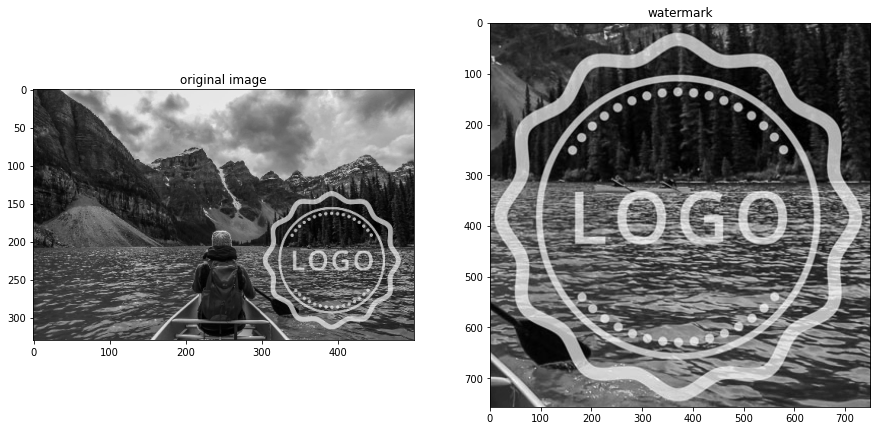

In [ ]:
img = cv2.imread('/content/4.jpg', 0) # reading original image
watermark = cv2.imread('/content/4_watermark.png', 0) # reading watermark

# downsampling (as some images are high resolution and computational operations takes significant time on these images)
img = img[0::2,0::2]

# plotting the original image and watermark of the image
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.title('original image')
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('watermark')
plt.imshow(watermark, cmap='gray')
plt.show()

<ipython-input-6-b0a8d3d7939b>:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(count)


[ 70 144]
144


Text(0.5, 1.0, 'binary image')

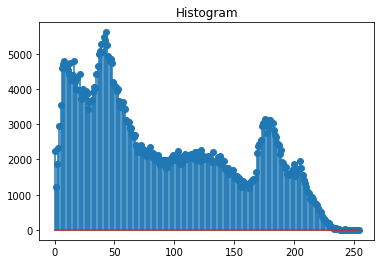

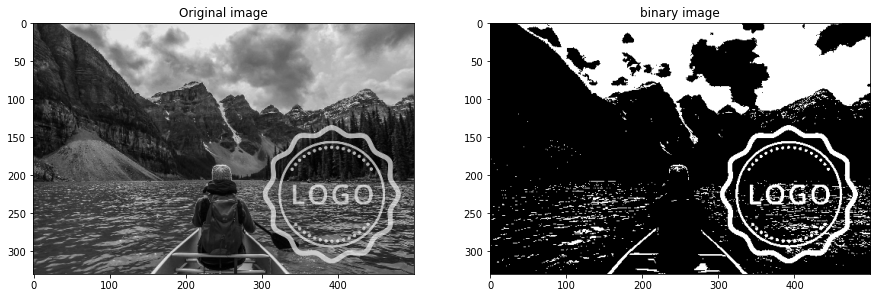

In [ ]:
I = watermark.copy() # creating a copy of the watermark of the image

count,value = np.histogram(I,255,[0,255])
# print('Value =',value)
# print(count)

plt.stem(count) 
plt.title('Histogram') # plotting the histogram of the watermark image

# otsu
thresholds = threshold_multiotsu(I, classes=3)
print(thresholds)
ret, otsu = cv2.threshold(I , 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) # implementing OTSU method using OpenCV library

L = I.max() - 1
T = thresholds[-1]
print(T)

mask_img = img.copy()
r, c = mask_img.shape

for i in range(r): # creating the mask such that it selects only the watermark area on the original image
    for j in range(c):
        if mask_img[i, j] < T:
            mask_img[i, j] = 0
        else:
            mask_img[i, j] = 255
            
# plotting the original image and the mask
plt.figure(figsize=(15, 15)) 
plt.subplot(1, 2, 1) 
plt.imshow(img, cmap='gray') 
plt.title('Original image')
plt.subplot(1, 2, 2)
plt.imshow(mask_img, cmap='gray') 
plt.title('binary image')

(330, 500) (330, 500)


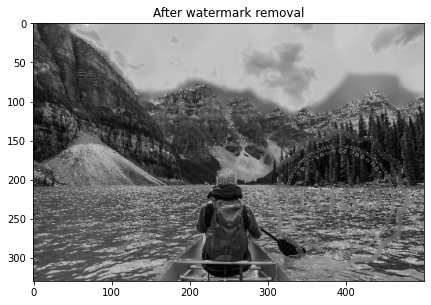

In [ ]:
print(img.shape, mask_img.shape) # checking if the original image and the mask is of the same shape, as to apply the inpaint function they must be of same shape
output = cv2.inpaint(img, mask_img, 10, cv2.INPAINT_TELEA)

# plotting the watermark free image
plt.figure(figsize=(7, 7))
plt.imshow(output, cmap='gray')
plt.title('After watermark removal')
plt.show()